**Objective**
- The Yulu project aims to identify the key factors driving demand for shared electric cycles in the Indian market.
- Assessing how well these factors explain fluctuations in demand.
- We'll analyze variables like seasonality, weather, temperature, and operational factors to pinpoint significant predictors.
- We'll evaluate their individual contributions to demand and overall predictive performance, providing actionable insights to optimize operations and marketing strategies for Yulu.

# Exploratory Data Anaylsis

In [2]:
import pandas as pd
import numpy as np

In [3]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
To: /content/bike_sharing.csv?1642089089
100% 648k/648k [00:00<00:00, 8.55MB/s]


In [4]:
df = pd.read_csv('bike_sharing.csv?1642089089')
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

## Getting numerical values

In [ ]:
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

## Histograms

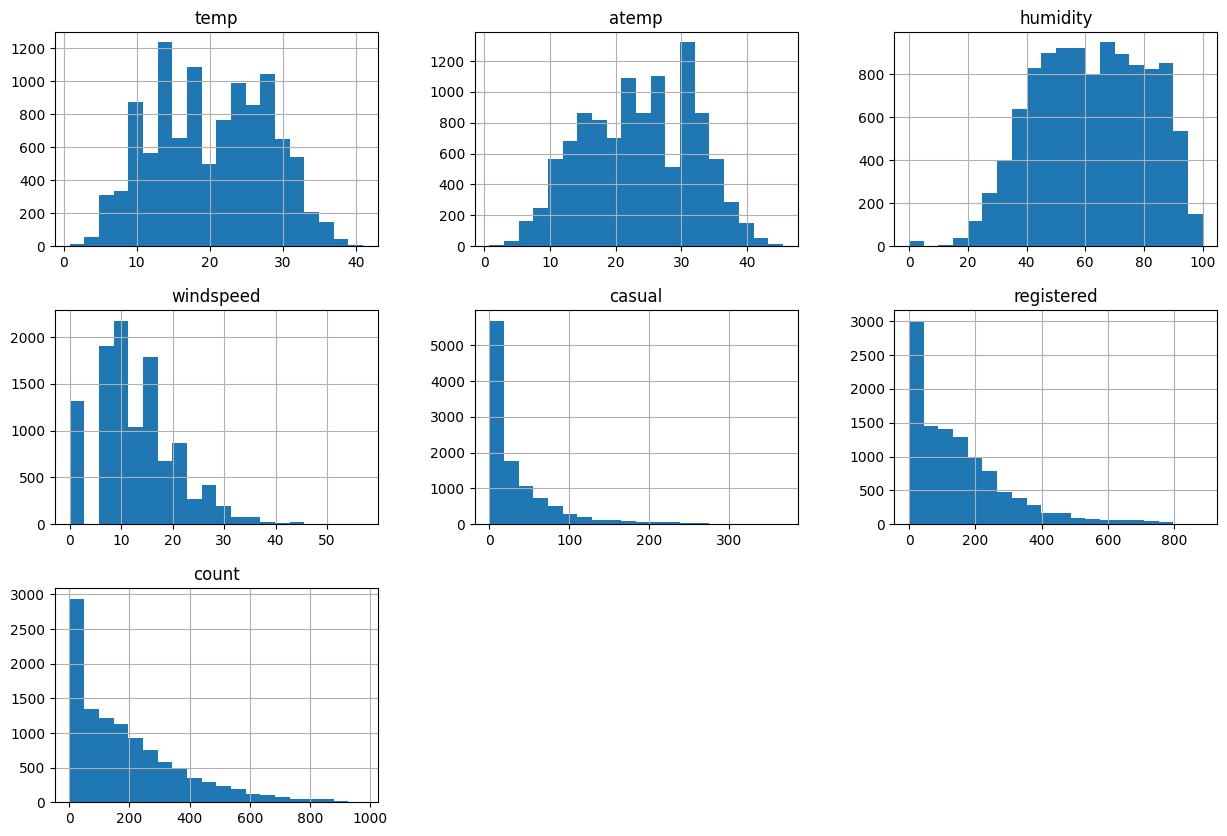

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
df[num_cols].hist(bins=20, figsize=(15, 10))
plt.show()

## Countplots

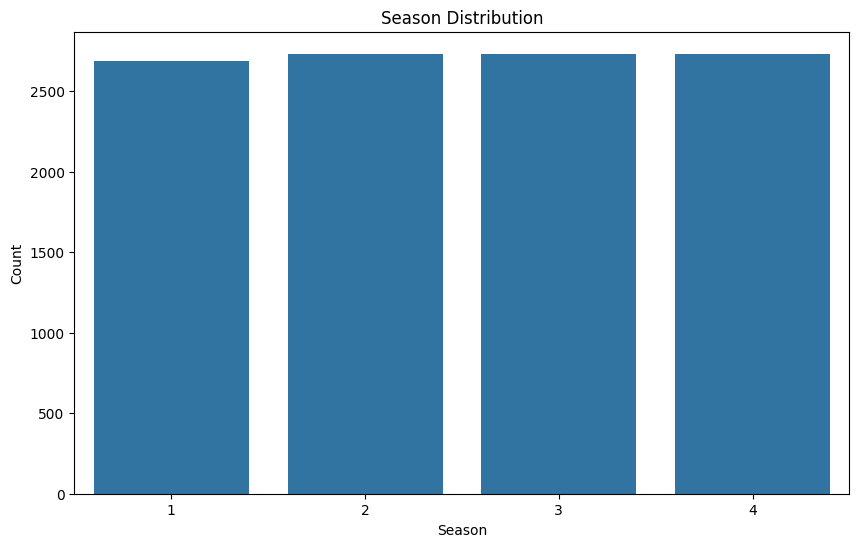

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='season', data=df)
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Season Distribution')
plt.show()

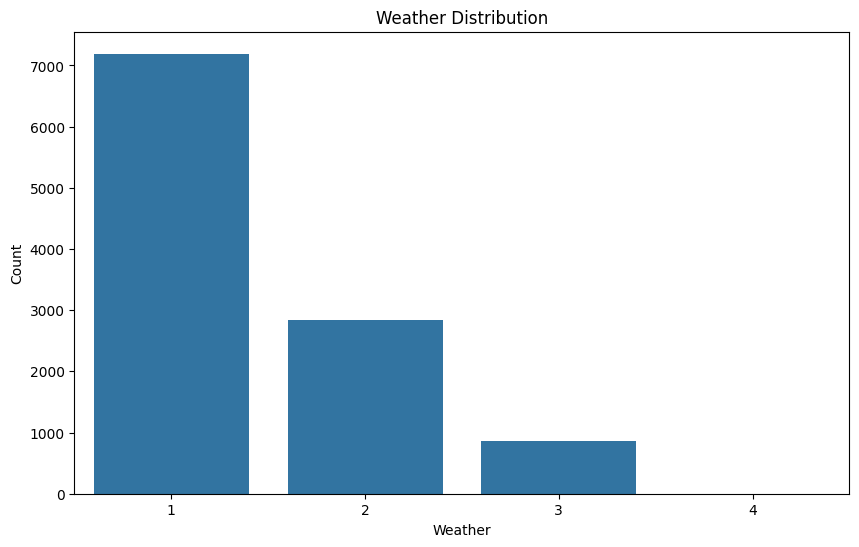

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='weather', data=df)
plt.xlabel('Weather')
plt.ylabel('Count')
plt.title('Weather Distribution')
plt.show()


## Identifing outliers

In [ ]:
def outliers(df, col):
  p_25 = np.percentile(df[col], 25)
  p_75 = np.percentile(df[col], 75)
  iqr = p_75 - p_25
  lower_bound = p_25 - 1.5 * iqr
  upper_bound = p_75 + 1.5 * iqr
  upper = len(df[df[col] > upper_bound])
  lower = len(df[df[col] < lower_bound])
  return upper + lower

<Axes: ylabel='humidity'>

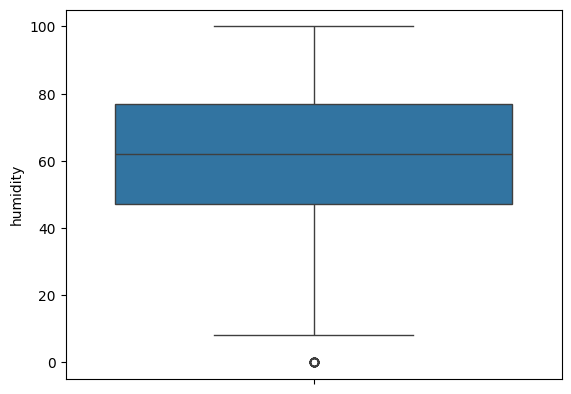

In [ ]:
sns.boxplot(data = df, y = 'humidity')

In [ ]:
outliers(df, 'humidity')

22

<Axes: ylabel='windspeed'>

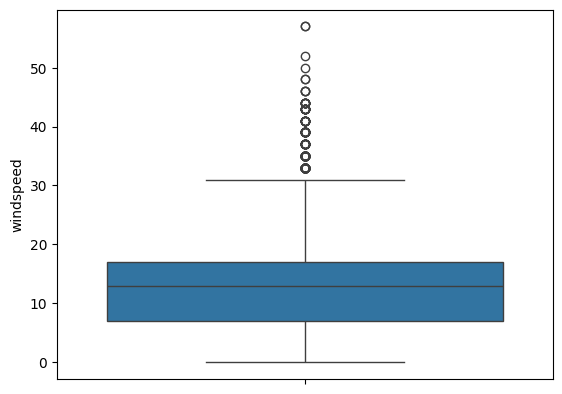

In [ ]:
sns.boxplot(data = df, y = 'windspeed')

In [ ]:
outliers(df, 'windspeed')

227

<Axes: ylabel='count'>

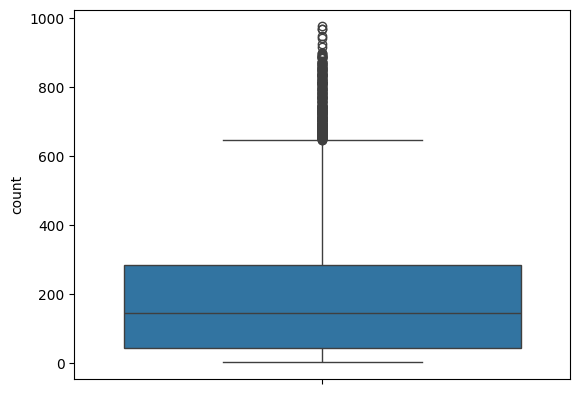

In [ ]:
sns.boxplot(data = df, y = 'count')

In [ ]:
outliers(df, 'count')

300

## Countplots with hues

<Axes: xlabel='season', ylabel='count'>

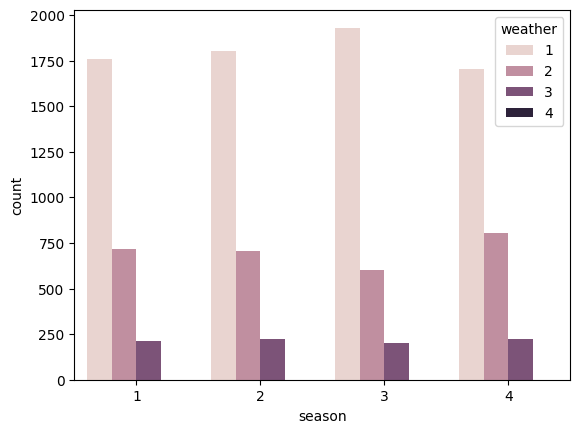

In [ ]:
sns.countplot(data = df, x = 'season', hue = 'weather')

<Axes: xlabel='workingday', ylabel='count'>

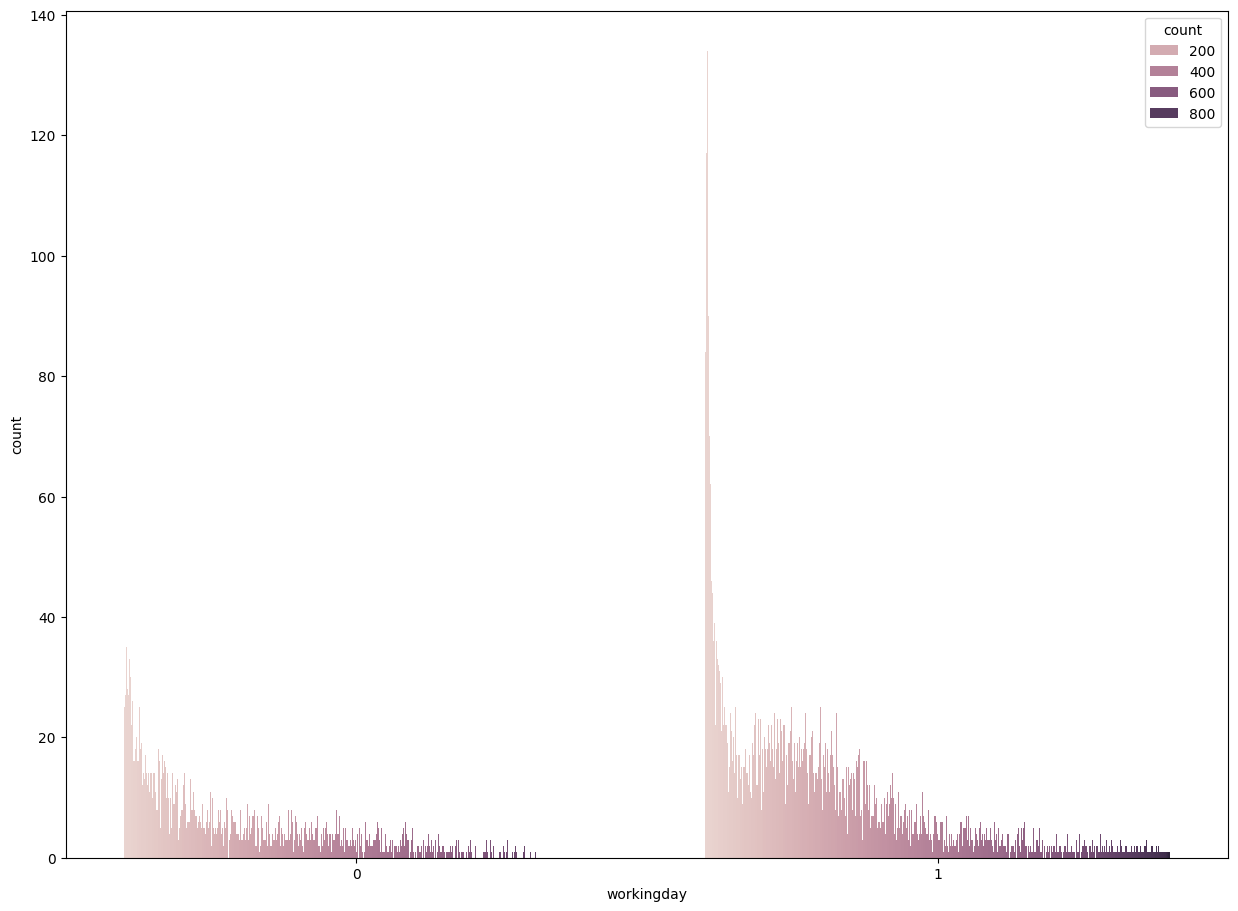

In [ ]:
plt.figure(figsize=(15, 11))
sns.countplot(data = df, x = 'workingday', hue = 'count')

<Axes: xlabel='weather', ylabel='count'>

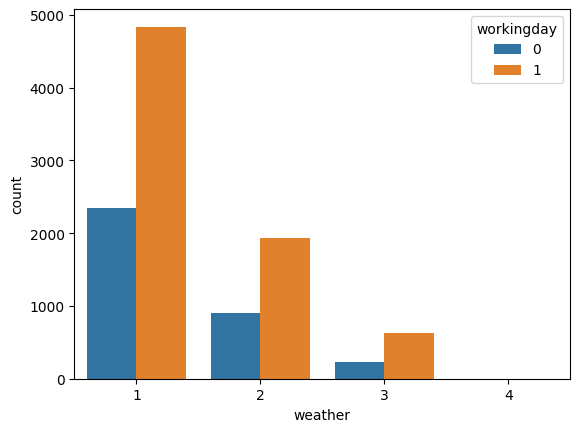

In [ ]:
sns.countplot(data = df, x = 'weather', hue = 'workingday')

## Piecharts

<function matplotlib.pyplot.show(close=None, block=None)>

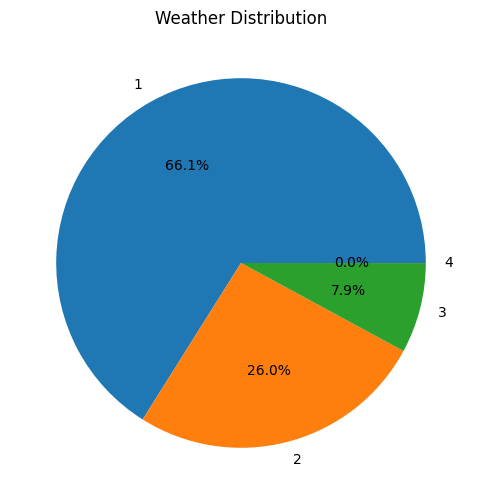

In [ ]:
plt.figure(figsize=(10, 6))
weather_count = df['weather'].value_counts()
plt.pie(weather_count, labels=weather_count.index, autopct='%1.1f%%')
plt.title('Weather Distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

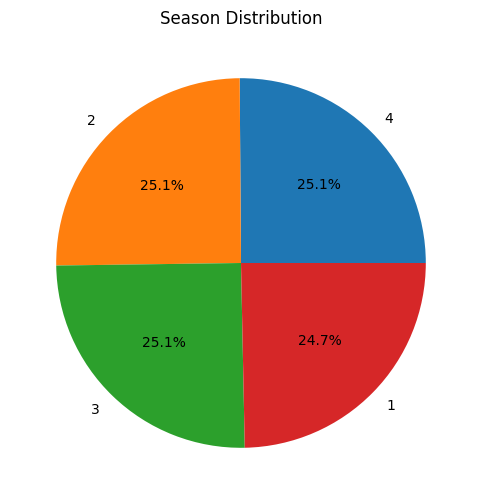

In [ ]:
plt.figure(figsize=(10, 6))
season_count = df['season'].value_counts()
plt.pie(season_count, labels=season_count.index, autopct='%1.1f%%')
plt.title('Season Distribution')
plt.show

## Heatmap

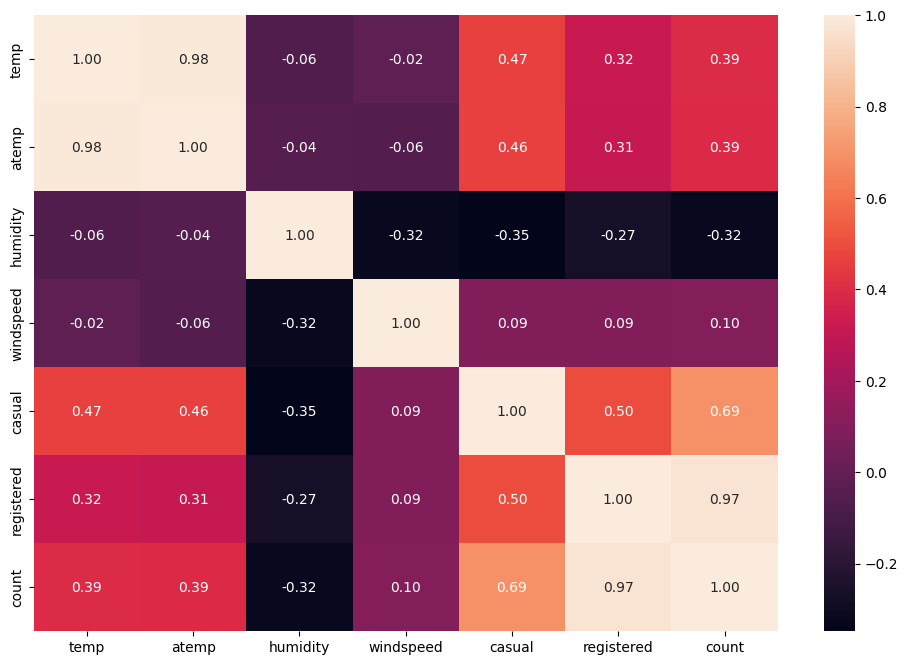

In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f')
plt.show()

## Scatterplots

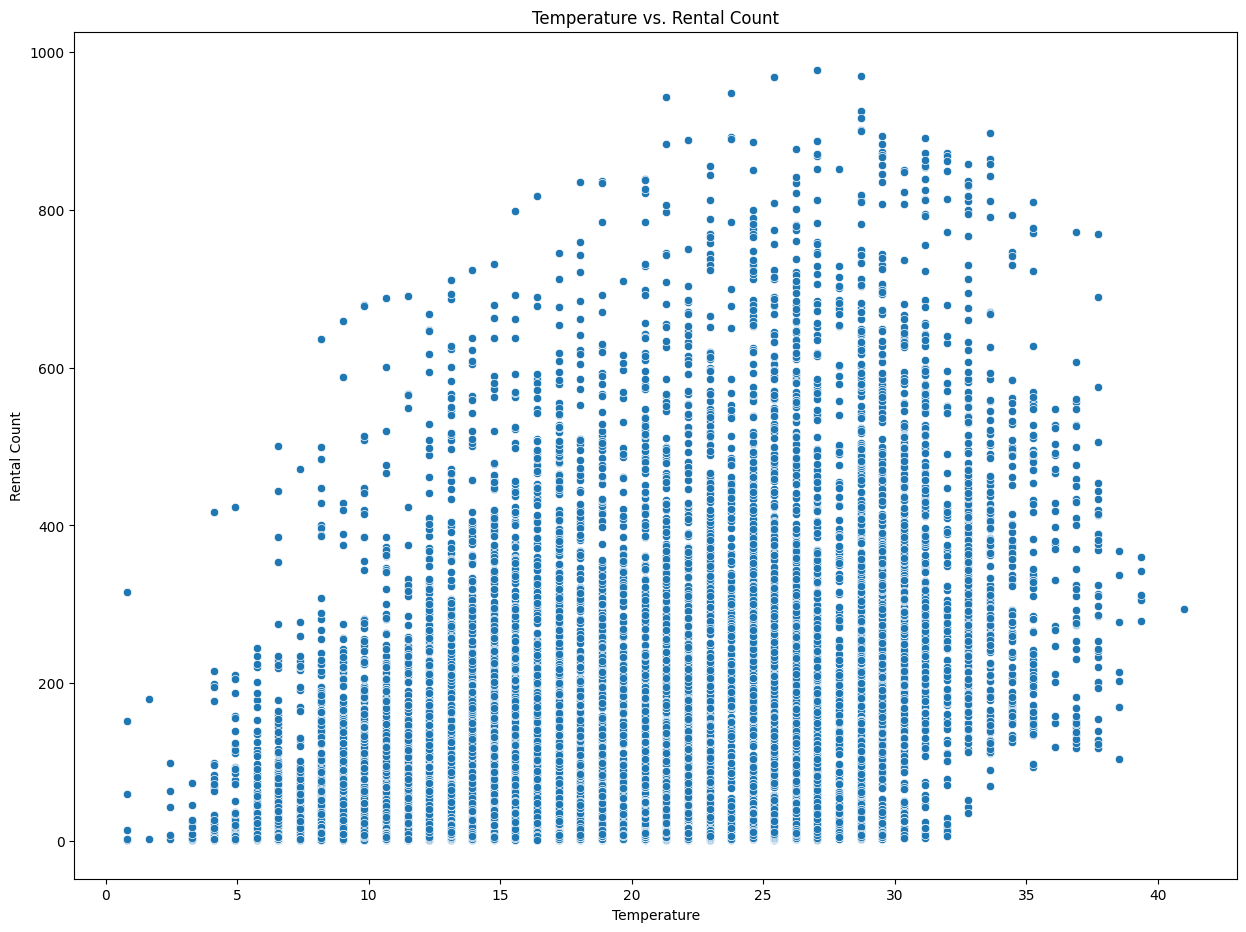

In [ ]:
plt.figure(figsize=(15, 11))
sns.scatterplot(x='temp', y='count', data=df)
plt.xlabel('Temperature')
plt.ylabel('Rental Count')
plt.title('Temperature vs. Rental Count')
plt.show()

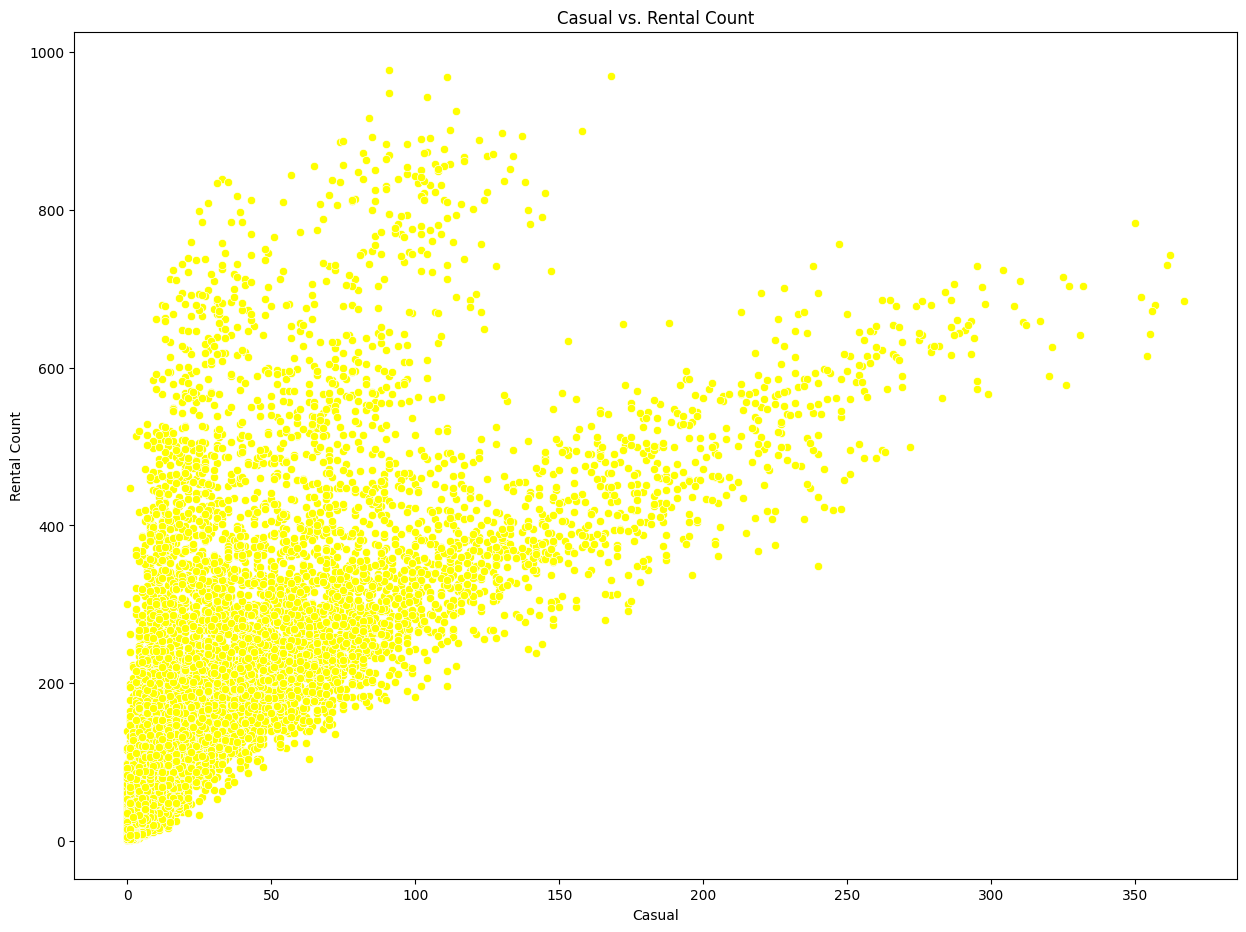

In [ ]:
#positively correlated
plt.figure(figsize=(15, 11))
sns.scatterplot(x='casual', y='count', data=df, color = 'yellow')
plt.xlabel('Casual')
plt.ylabel('Rental Count')
plt.title('Casual vs. Rental Count')
plt.show()

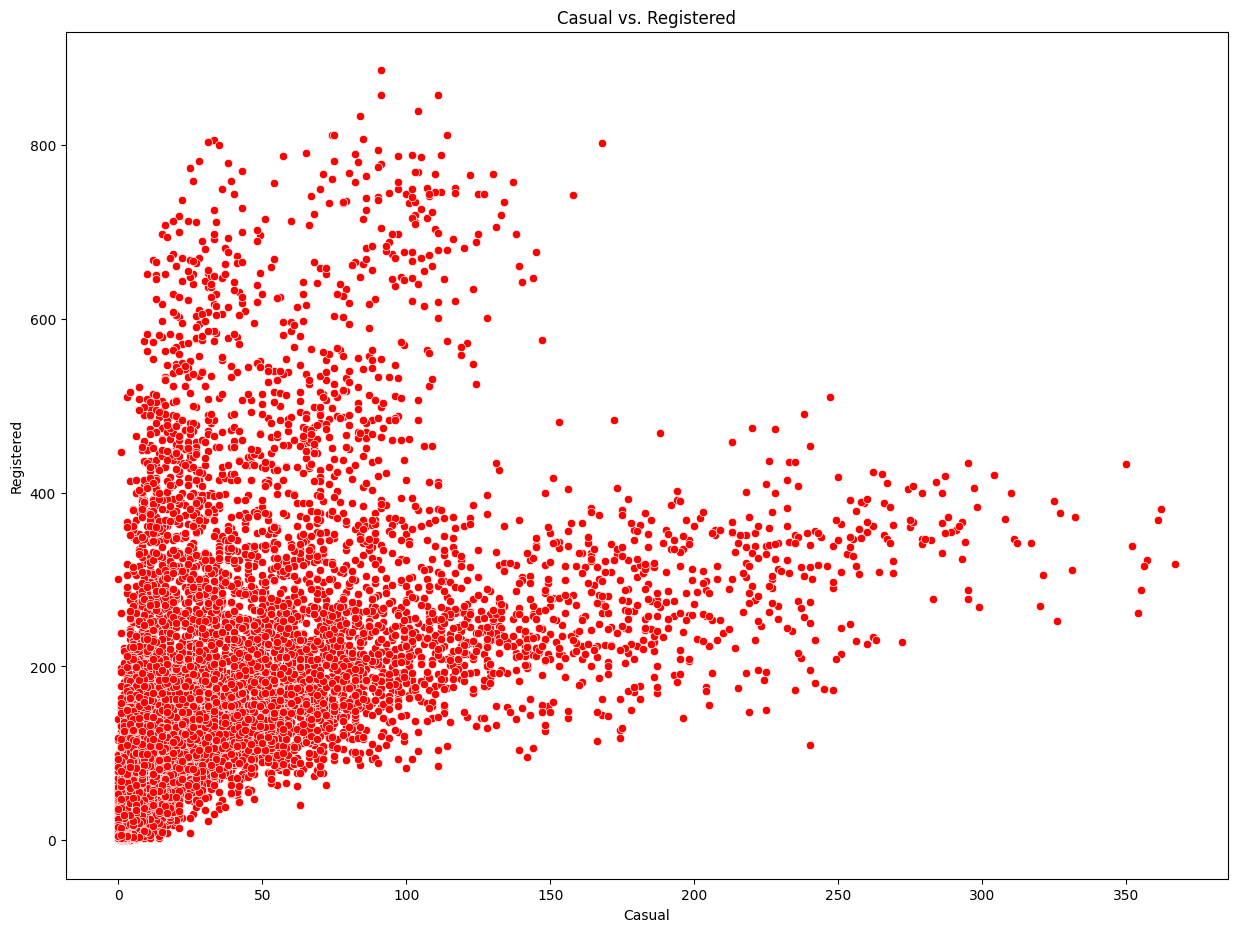

In [ ]:
#positively correlated
plt.figure(figsize=(15, 11))
sns.scatterplot(x='casual', y='registered', data=df, color = 'red')
plt.xlabel('Casual')
plt.ylabel('Registered')
plt.title('Casual vs. Registered')
plt.show()

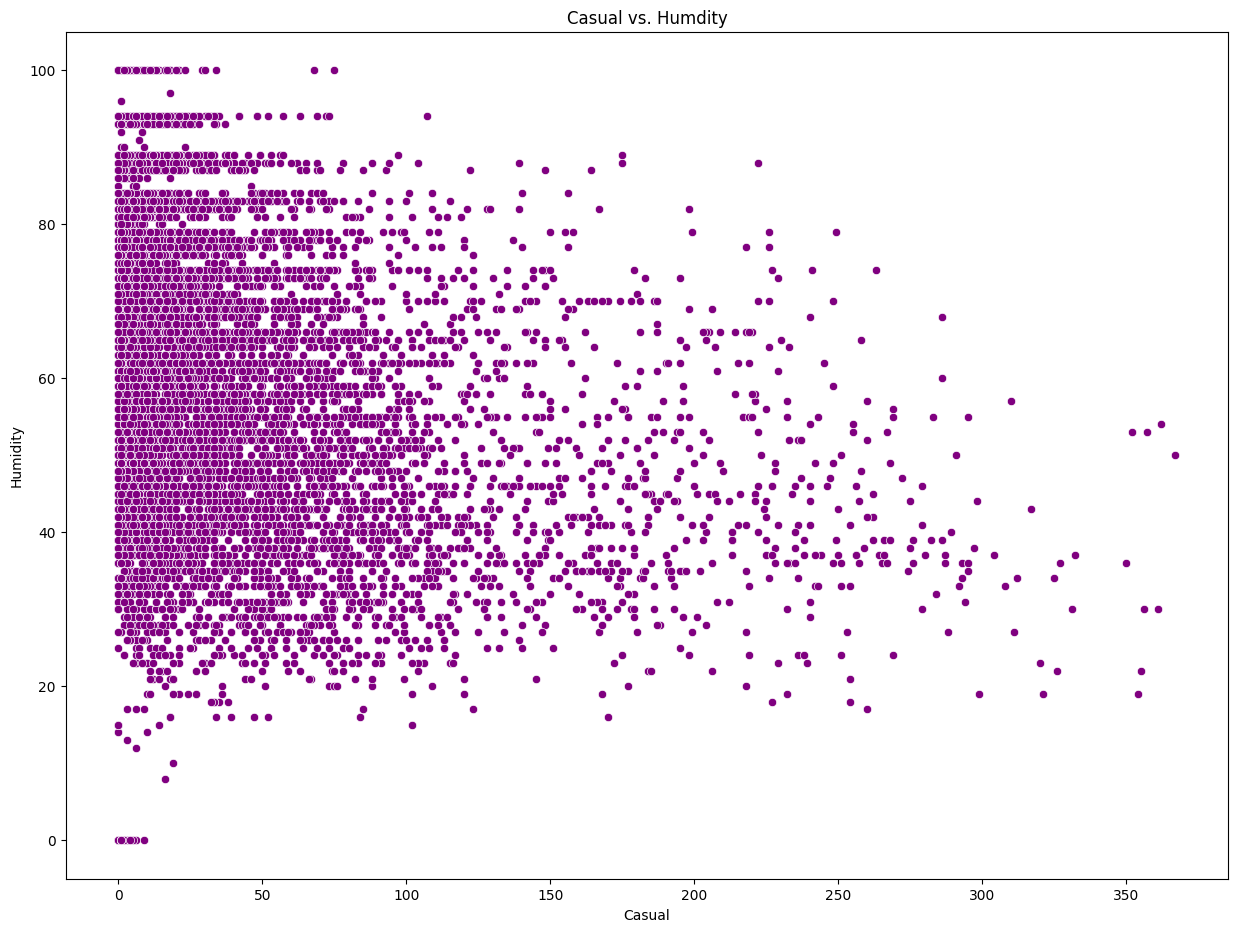

In [ ]:
#negatively correlated
plt.figure(figsize=(15, 11))
sns.scatterplot(x='casual', y='humidity', data=df, color = 'purple')
plt.xlabel('Casual')
plt.ylabel('Humidity')
plt.title('Casual vs. Humdity')
plt.show()

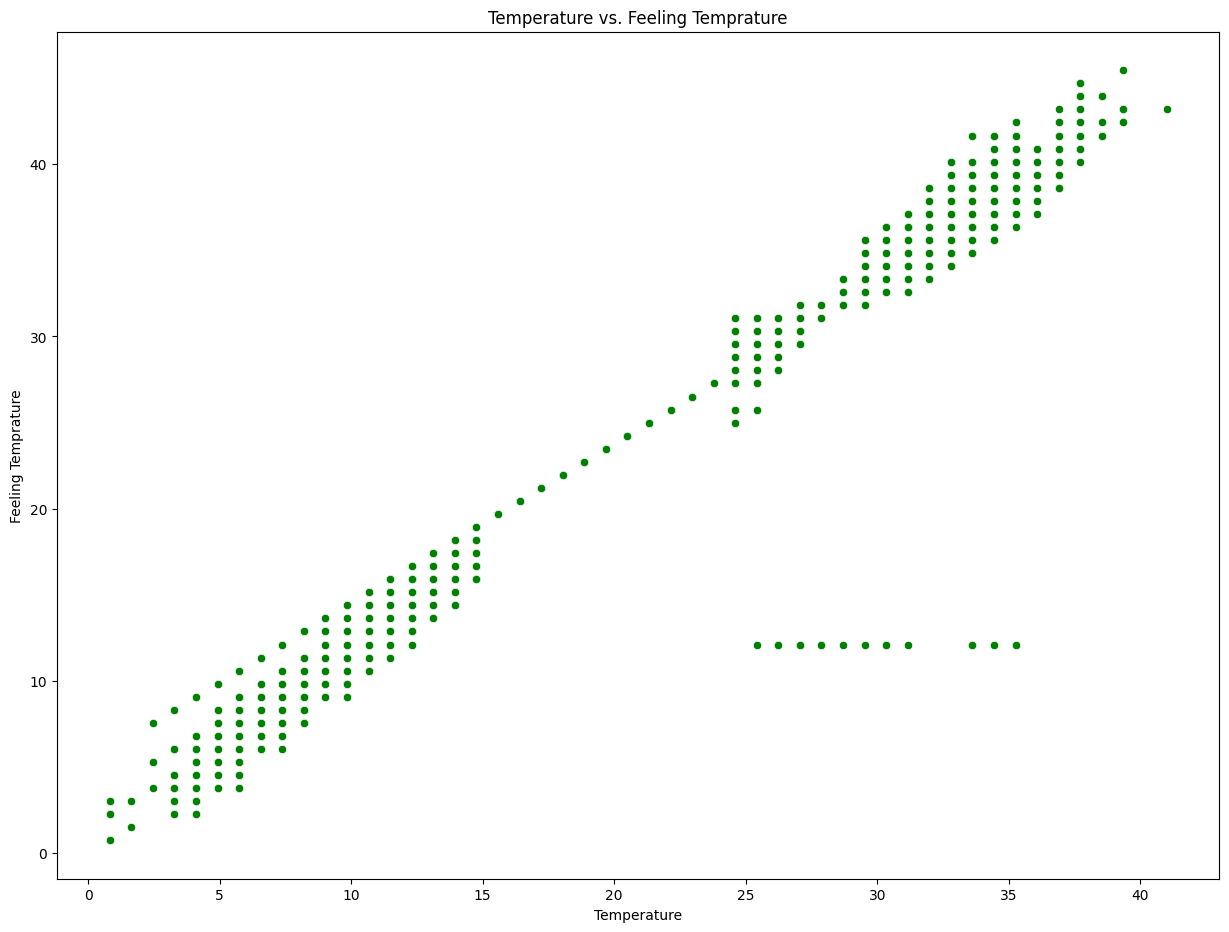

In [ ]:
plt.figure(figsize=(15, 11))
sns.scatterplot(x='temp', y='atemp', data=df, color = 'green')
plt.xlabel('Temperature')
plt.ylabel('Feeling Temprature')
plt.title('Temperature vs. Feeling Temprature')
plt.show()

## Barplots

<ipython-input-62-523e8a6cd347>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='count', data=df, palette = 'Set1')


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

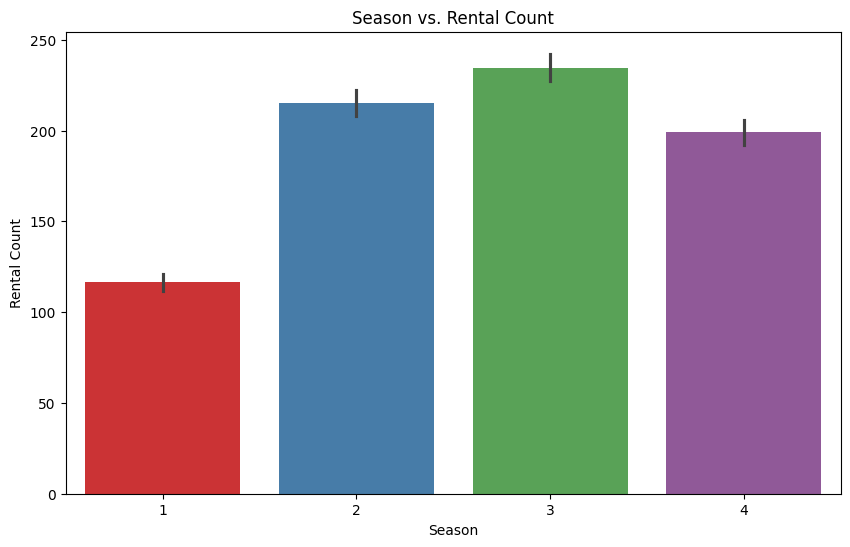

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='count', data=df, palette = 'Set1')
plt.xlabel('Season')
plt.ylabel('Rental Count')
plt.title('Season vs. Rental Count')
plt

<ipython-input-64-057d1a908623>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather', y='count', data=df, palette = 'Set2')


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

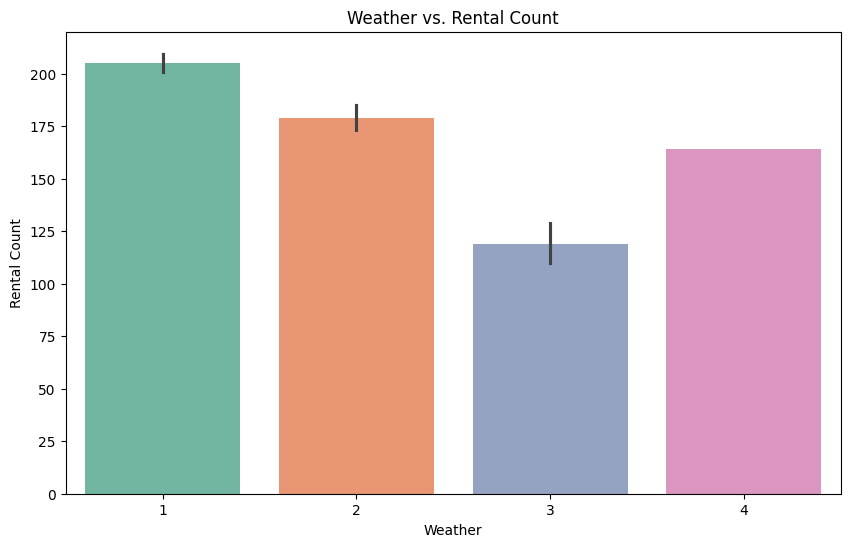

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weather', y='count', data=df, palette = 'Set2')
plt.xlabel('Weather')
plt.ylabel('Rental Count')
plt.title('Weather vs. Rental Count')
plt

<ipython-input-25-88b8df92dbd0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Temperature', y='Rental Count', data=df_temp_bins_mean, palette='coolwarm')


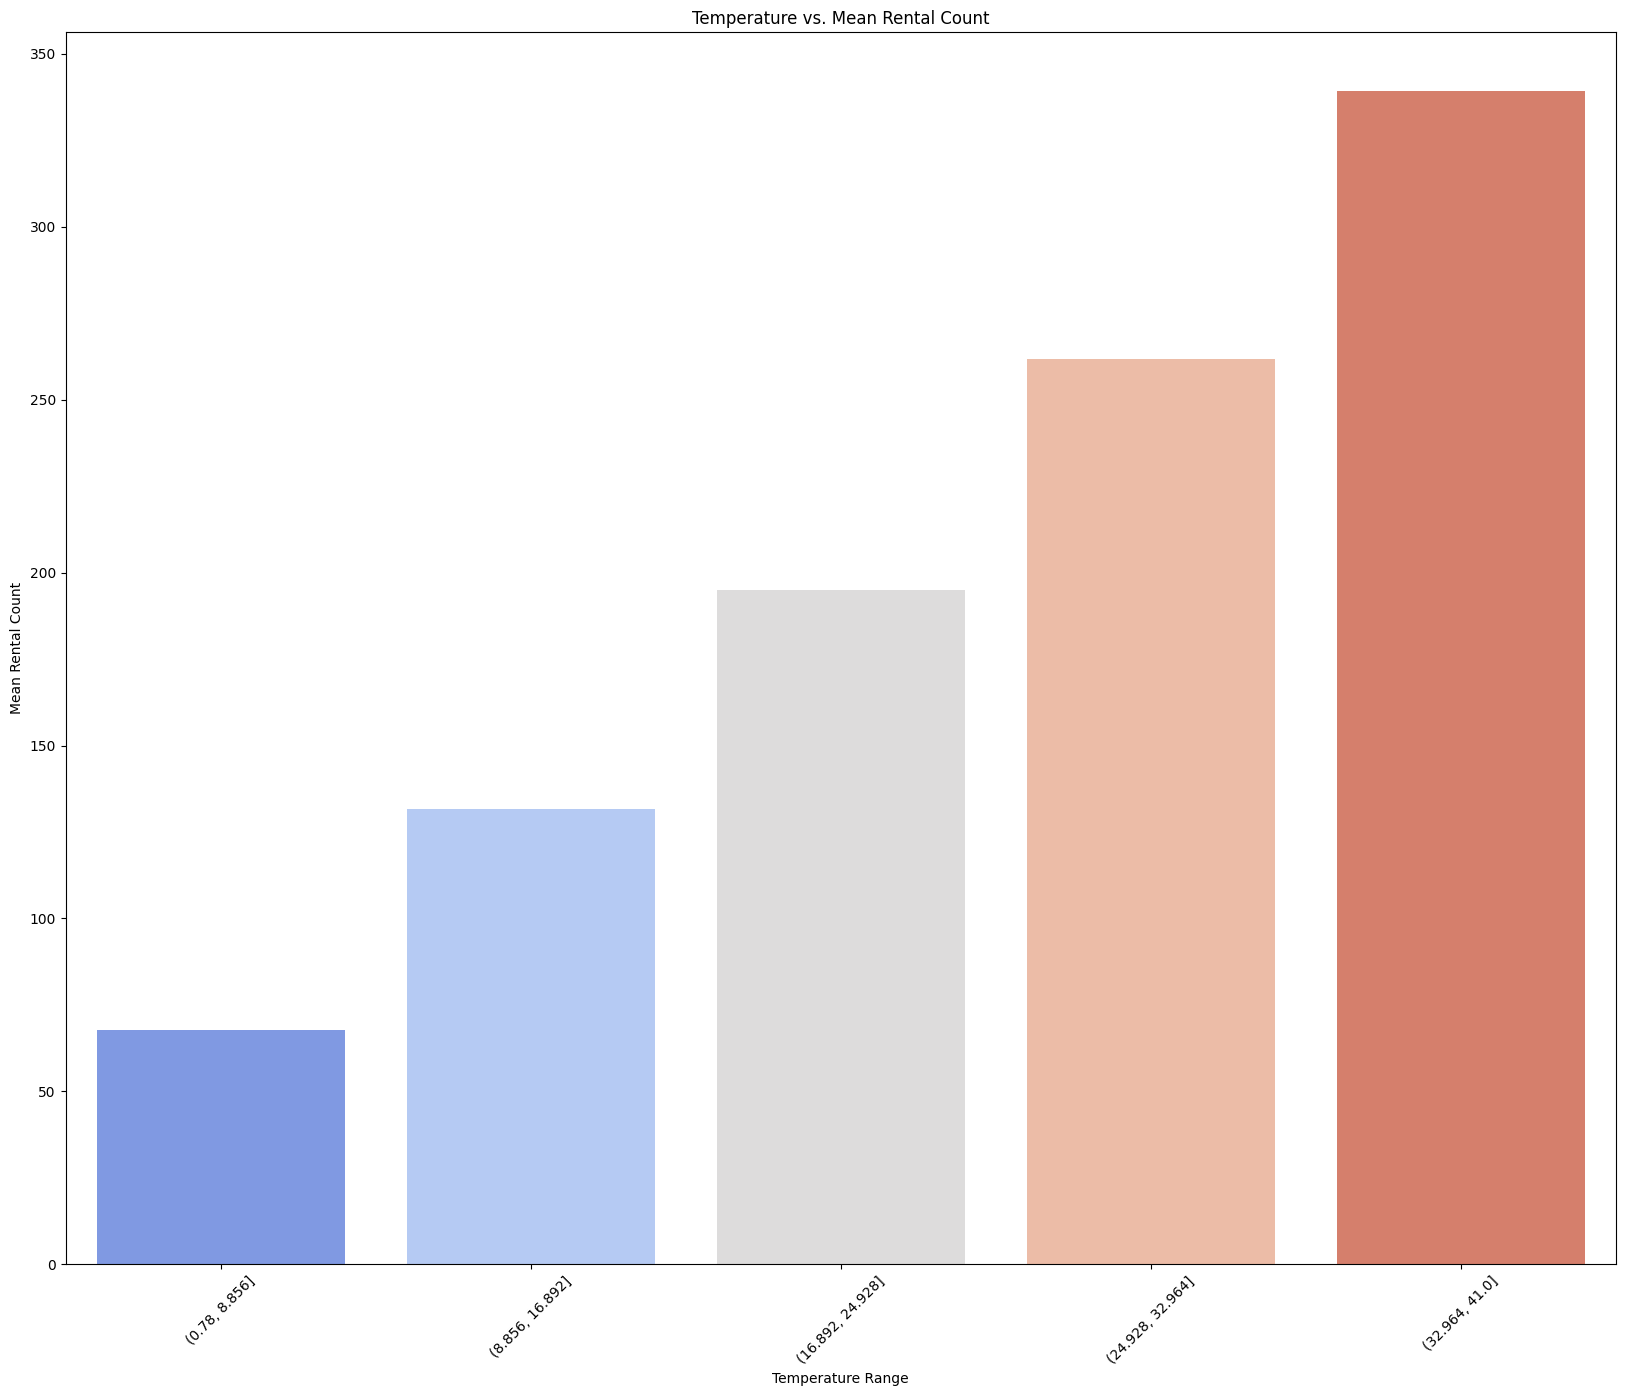

In [ ]:
# Define the temperature bins
temperature_bins = pd.cut(df['temp'], bins=5)  # Adjust the number of bins as needed

# Create a new DataFrame with temperature bins and rental counts
df_temp_bins = pd.DataFrame({'Temperature': temperature_bins, 'Rental Count': df['count']})

# Group by temperature bins and calculate the mean rental count
df_temp_bins_mean = df_temp_bins.groupby('Temperature')['Rental Count'].mean().reset_index()

# Plot the bar graph with temperature ranges on the x-axis
plt.figure(figsize=(20, 16))
sns.barplot(x='Temperature', y='Rental Count', data=df_temp_bins_mean, palette='coolwarm')
plt.xlabel('Temperature Range')
plt.ylabel('Mean Rental Count')
plt.title('Temperature vs. Mean Rental Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

<ipython-input-27-8e89fd80ea0f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Humidity', y='Rental Count', data=df_humidity_bins_mean, palette='coolwarm')


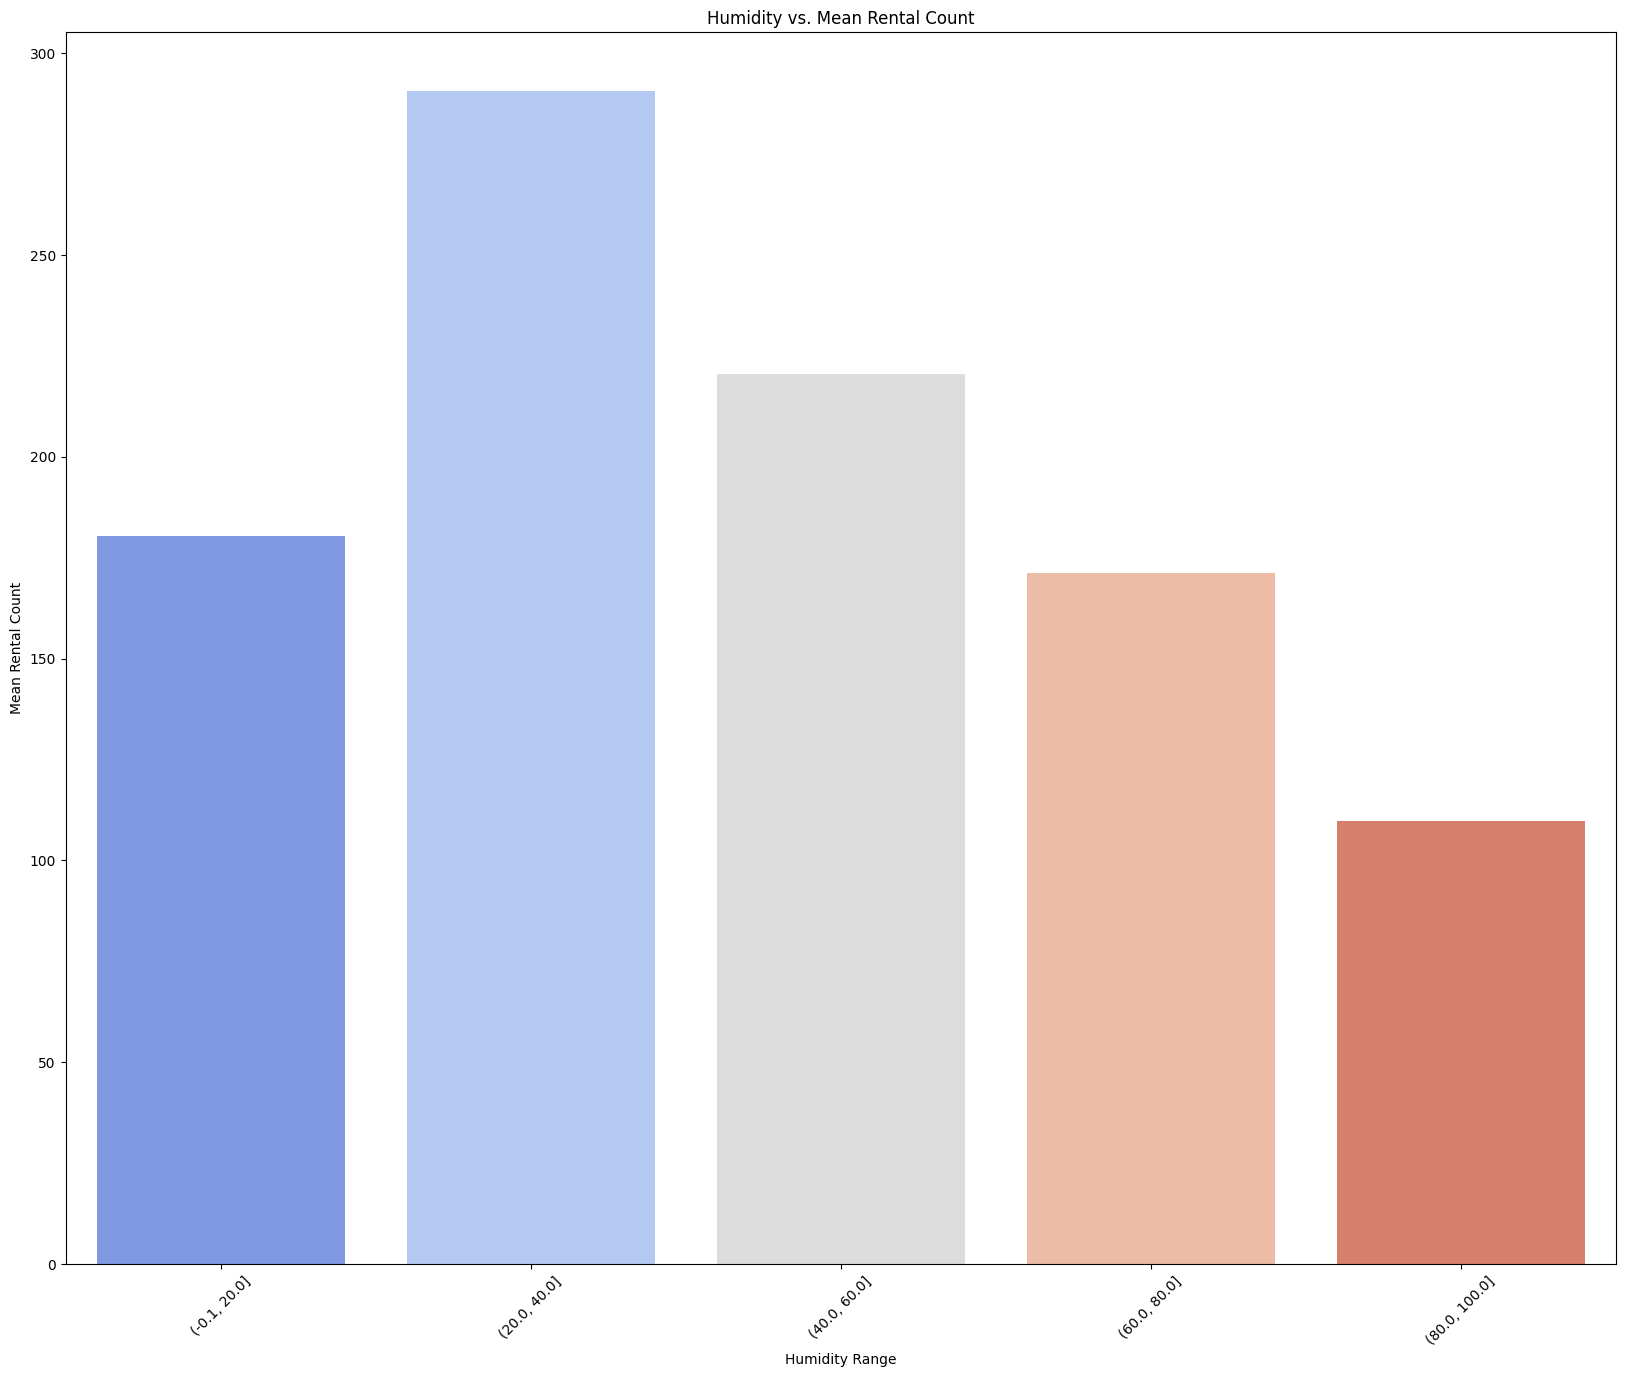

In [ ]:
# Define the temperature bins
humidity_bins = pd.cut(df['humidity'], bins=5)  # Adjust the number of bins as needed

# Create a new DataFrame with temperature bins and rental counts
df_humidity_bins = pd.DataFrame({'Humidity': humidity_bins, 'Rental Count': df['count']})

# Group by temperature bins and calculate the mean rental count
df_humidity_bins_mean = df_humidity_bins.groupby('Humidity')['Rental Count'].mean().reset_index()

# Plot the bar graph with temperature ranges on the x-axis
plt.figure(figsize=(20, 16))
sns.barplot(x='Humidity', y='Rental Count', data=df_humidity_bins_mean, palette='coolwarm')
plt.xlabel('Humidity Range')
plt.ylabel('Mean Rental Count')
plt.title('Humidity vs. Mean Rental Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## Lineplots

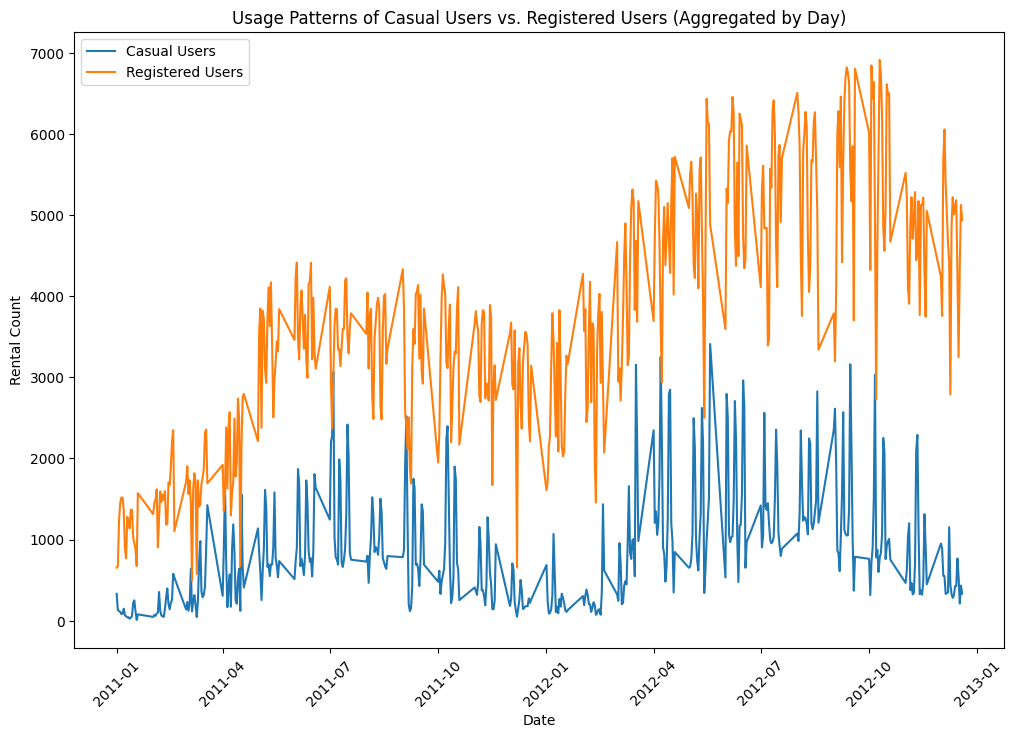

In [ ]:
# Convert 'datetime' column to datetime data type
df['datetime'] = pd.to_datetime(df['datetime'])

# Aggregate rental counts into bins of days
df['date_bin'] = df['datetime'].dt.date

# Group by date bins and calculate the sum of rental counts for casual and registered users
df_agg = df.groupby('date_bin').agg({'casual': 'sum', 'registered': 'sum'}).reset_index()

# Plot rental counts for casual and registered users
plt.figure(figsize=(12, 8))
sns.lineplot(x='date_bin', y='casual', data=df_agg, label='Casual Users')
sns.lineplot(x='date_bin', y='registered', data=df_agg, label='Registered Users')
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.title('Usage Patterns of Casual Users vs. Registered Users (Aggregated by Day)')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


## Pairplots

<Figure size 8000x3200 with 0 Axes>

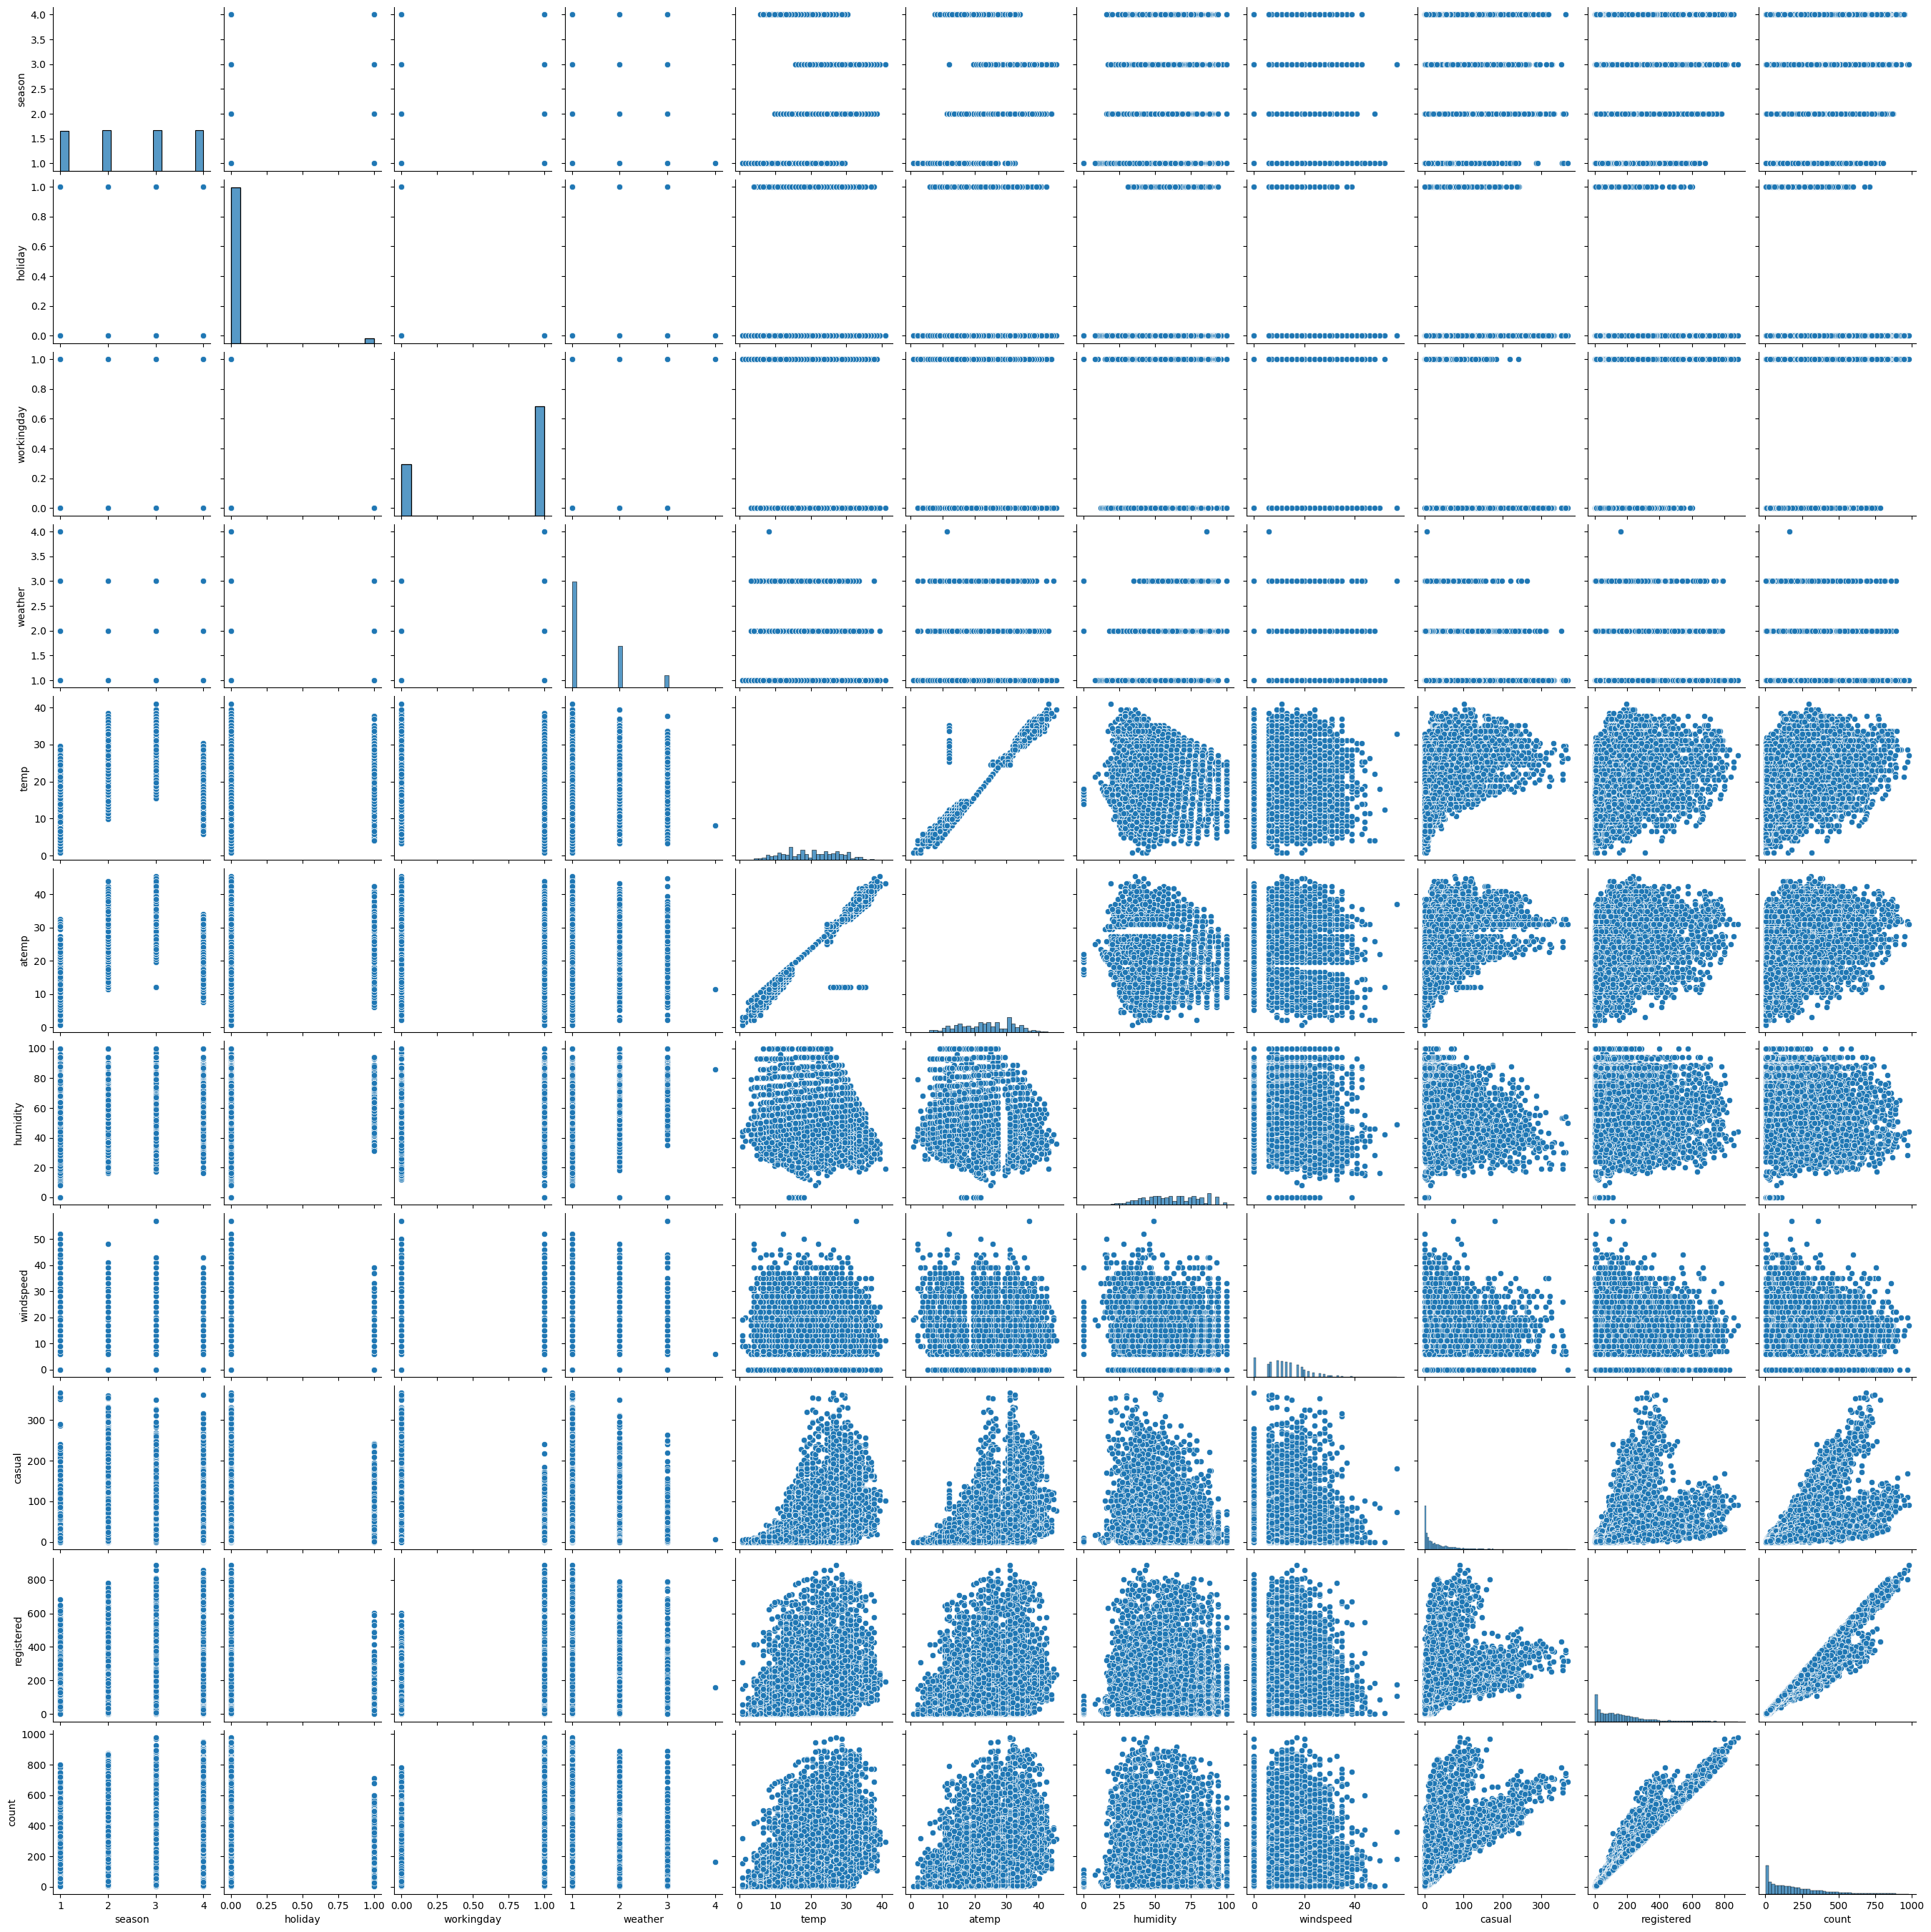

In [15]:
plt.figure(figsize=(80, 32))
sns.pairplot(df)

---
## Observations
- Seasonal Trends: People typically use Yulu mostly in the season 3 that is the fall season.
- Weather Impact: As seen by the graph as well, the weather conditions 1 i.e. the Clear, Few clouds, partly cloudy, partly cloudy, weather conditions influence the peopke to use Yulu bikes more and the downtrend is clearly in the conditions 3.
- Weekday vs. Weekend Demand: The demands for these bikes are more on a working day as compared to a holiday.
- Temperature and Humidity Effects: High temprature induces higher usage of yulu bikes. On the other hand, less humidity induces more demand of them.
- User Type Analysis: Registered users contribute more to rental count.
- Outliers and Anomalies: There are days when the humidity was lower than expected. And there are days where windpeed and rental counts was more than expected.
- Correlation Between Variables: Registered users are very highly correlated to the rental counts where as the casual users rarely uses the bikes in humid conditions.
- Overall Demand Trends: Registered users tend to use more yulu bikes as compared to casual users irrespective of the weather conditions.
---


# Hypothesis Testing

In [6]:
from scipy.stats import norm
from statsmodels.stats import weightstats as tests
from scipy import stats
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import chisquare
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import kruskal
from scipy.stats import shapiro
from scipy.stats import pearsonr, spearmanr
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import f
from scipy.stats import t

## Z Tests

<u> Scenario 1</u> 🐾: To test if the mean temperature in your dataset is significantly different from a specific value (e.g., 20.23°C).

In [21]:
# (One sample z test)
# H0 : Mean temprature = 20.23°C
# H1 : Mean temprature ≠ 20.23°C

tempratures = df['temp']
mean_temprature = 20.23

sample_mean = tempratures.mean()
sample_std = tempratures.std()
sample_size = len(tempratures)

z_statistic = (sample_mean - mean_temprature) / (sample_std / np.sqrt(sample_size))
p_value = 2 * (1 - stats.norm.cdf(abs(z_statistic)))

print("Z-statistic:", z_statistic)
print("P-value:", p_value)

alpha = 0.05

if (p_value < alpha):
    print("Reject the null hypothesis. The mean temperature is significantly different from 20.23°C.")
else:
    print("Fail to reject the null hypothesis. The mean temperature is not significantly different from 20.23°C.")


Z-statistic: 0.011513718334785377
P-value: 0.990813584870964
Fail to reject the null hypothesis. The mean temperature is not significantly different from 20.23°C.


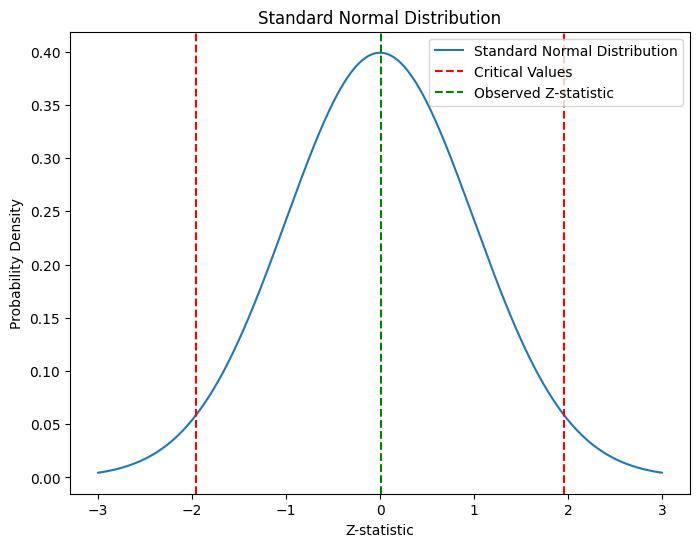

In [22]:
# Generate x values for the standard normal distribution
x = np.linspace(-3, 3, 1000)  # Adjust range as needed

# Calculate the probability density function (PDF) for the standard normal distribution
pdf = norm.pdf(x)

# Plot the standard normal distribution
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label='Standard Normal Distribution')

# Add labels and title
plt.title('Standard Normal Distribution')
plt.xlabel('Z-statistic')
plt.ylabel('Probability Density')

# Add vertical lines for the critical values (z-statistic for the chosen significance level)
alpha = 0.05
z_critical_left = norm.ppf(alpha/2)
z_critical_right = norm.ppf(1 - alpha/2)
plt.axvline(z_critical_left, color='r', linestyle='--', label='Critical Values')
plt.axvline(z_critical_right, color='r', linestyle='--')

# Add vertical line for the observed Z-statistic
plt.axvline(z_statistic, color='g', linestyle='--', label='Observed Z-statistic')

# Add legend
plt.legend()

# Show plot
plt.show()


<u> Scenario 2</u> 🐾 : To compare the mean temperature between two seasons (e.g., summer vs. winter).

In [ ]:
# (Two sample z test)
# H0 : Mean temprature in summer = Mean temprature in winter
# H1 : Mean temprature in summer ≠ Mean temprature in winter

tempratures_summer = df[df['season'] == 2]['temp']
tempratures_winter = df[df['season'] == 4]['temp']

summer_mean = tempratures_summer.mean()
winter_mean = tempratures_winter.mean()

summer_std = tempratures_summer.std()
winter_std = tempratures_winter.std()

sample_size_summer = len(tempratures_summer)
sample_size_winter = len(tempratures_winter)

summer_std_error = np.sqrt((summer_std ** 2) / sample_size_summer)
winter_std_error = np.sqrt((winter_std ** 2) / sample_size_winter)

z_statistic = (summer_mean - winter_mean) / np.sqrt(summer_std_error ** 2 + winter_std_error ** 2)
p_value = 2 * (1 - stats.norm.cdf(abs(z_statistic)))

print("Z-statistic:", z_statistic)
print("P-value:", p_value)

alpha = 0.05

if (p_value < alpha):
    print("Reject the null hypothesis. The mean temperature in summer is significantly different from the mean temperature in winter.")
else:
    print("Fail to reject the null hypothesis. The mean temperature in summer is not significantly different from the mean temperature in winter.")

Z-statistic: 46.06335953664656
P-value: 0.0
Reject the null hypothesis. The mean temperature in summer is significantly different from the mean temperature in winter.


<u> Scenario 3</u> 🐾 : Test if the proportion of working days is significantly different from 0.7.

In [ ]:
# (One sample z test for proportions)
# H0 : Proportion of working days = 0.7
# H1 : Proportion of working days ≠ 0.7

working_days = df[df['workingday'] == 1]['workingday'].count()
total_days = df['workingday'].count()

sample_proportions = working_days / total_days

z_statistic, p_value = proportions_ztest(count=working_days, nobs=total_days, value=0.7)

print("Z-statistic:", z_statistic)
print("P-value:", p_value)

alpha = 0.05

if (p_value < alpha):
    print("Reject the null hypothesis. The proportion of working days is significantly different from 0.7.")
else:
    print("Fail to reject the null hypothesis. The proportion of working days is not significantly different from 0.7.")

Z-statistic: -4.280872348527879
P-value: 1.8616212462084614e-05
Reject the null hypothesis. The proportion of working days is significantly different from 0.7.


<u>Scenario 4</u> 🐾 : To compare the proportion of working days between two seasons.

In [ ]:
# (Two sample z test of proportions)
# H0 : Proportion of working days in summer = Proportion of working days in winter
# H1 : Proportion of working days in summer ≠ Proportion of working days in winter

working_days_summer = df[(df['season'] == 2) & (df['workingday'] == 1)]['workingday'].count()
total_days_summer = df[df['season'] == 2]['workingday'].count()

working_days_winter = df[(df['season'] == 4) & (df['workingday'] == 1)]['workingday'].count()
total_days_winter = df[df['season'] == 4]['workingday'].count()

proportions_summer = working_days_summer / total_days_summer
proportions_winter = working_days_winter / total_days_winter

z_statistic, p_value = proportions_ztest(count=[working_days_summer, working_days_winter], nobs=[total_days_summer, total_days_winter], value=0)

print("Z-statistic:", z_statistic)
print("P-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. The proportion of working days in summer is significantly different from the proportion of working days in winter.")
else:
    print("Fail to reject the null hypothesis. The proportion of working days in summer is not significantly different from the proportion of working days in winter.")

Z-statistic: 1.3870653052714688
P-value: 0.16542185025490808
Fail to reject the null hypothesis. The proportion of working days in summer is not significantly different from the proportion of working days in winter.


## T Tests

<u> Scenario 5</u> 🐾 : To test if the mean humidity is significantly different from 50%.

In [23]:
# (One sample t test)
# H0 : Mean humidity = 50%
# H1 : Mean humidity ≠ 50%

humidity_data = df['humidity']

popolation_mean = 50

t_statistic, p_value = stats.ttest_1samp(humidity_data, popolation_mean)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. The mean humidity is significantly different from 50%.")
else:
    print("Fail to reject the null hypothesis. The mean humidity is not significantly different from 50%.")

T-statistic: 64.44185299787829
P-value: 0.0
Reject the null hypothesis. The mean humidity is significantly different from 50%.


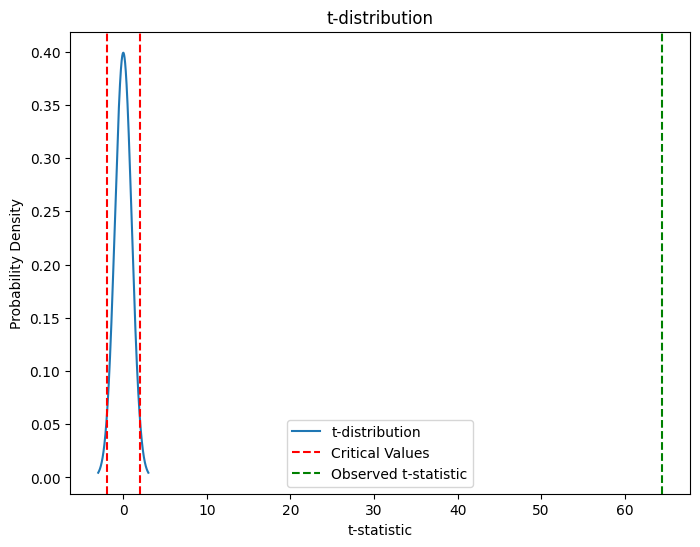

In [25]:
# Degrees of freedom
df = len(humidity_data) - 1  # Degrees of freedom for a one-sample t-test

# Generate x values for the t-distribution
x = np.linspace(-3, 3, 1000)  # Adjust range as needed

# Calculate the probability density function (PDF) for the t-distribution
pdf = t.pdf(x, df)

# Plot the t-distribution
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label='t-distribution')

# Add labels and title
plt.title('t-distribution')
plt.xlabel('t-statistic')
plt.ylabel('Probability Density')

# Add vertical lines for the critical values (t-statistics for the chosen significance level)
alpha = 0.05
t_critical_left = t.ppf(alpha/2, df)
t_critical_right = t.ppf(1 - alpha/2, df)
plt.axvline(t_critical_left, color='r', linestyle='--', label='Critical Values')
plt.axvline(t_critical_right, color='r', linestyle='--')

# Add vertical line for the observed t-statistic
plt.axvline(t_statistic, color='g', linestyle='--', label='Observed t-statistic')

# Add legend
plt.legend()

# Show plot
plt.show()


<u>Scenario 6</u> 🐾 : To compare the mean temperature between holidays and non-holidays.

In [ ]:
# (Two sample t test independent)
# H0 : Mean temperature in holidays = Mean temperature in non-holidays
# H1 : Mean temperature in holidays ≠ Mean temperature in non-holidays

tempratures_holidays = df[df['holiday'] == 1]['temp']
tempratures_non_holidays = df[df['holiday'] == 0]['temp']

t_statistic, p_value = stats.ttest_ind(tempratures_holidays, tempratures_non_holidays)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. The mean temperature in holidays is significantly different from the mean temperature in non-holidays.")
else:
    print("Fail to reject the null hypothesis. The mean temperature in holidays is not significantly different from the mean temperature in non-holidays.")

T-statistic: 0.030734915988800023
P-value: 0.9754815089138904
Fail to reject the null hypothesis. The mean temperature in holidays is not significantly different from the mean temperature in non-holidays.


<u> Scenario 7</u> 🐾 : To test if there is a significant difference between the current temperature ('temp') and the adjusted temperature ('atemp') after including various factors like windspeed and humidity.

In [ ]:
# (two sample t test relative)
# H0 : Mean temperature after including windspeed and humidity = Mean temperature before including windspeed and humidity
# H1 : Mean temperature after including windspeed and humidity ≠ Mean temperature before including windspeed and humidity

temprature_before = df['temp']
temprature_after = df['atemp']

t_statistic, p_value = stats.ttest_rel(temprature_before, temprature_after)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the current temperature and the adjusted temperature after including various factors like windspeed and humidity.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the current temperature and the adjusted temperature after including various factors like windspeed and humidity.")

T-statistic: -228.0524683714081
P-value: 0.0
Reject the null hypothesis. There is a significant difference between the current temperature and the adjusted temperature after including various factors like windspeed and humidity.


<u>Scenario 8</u> 🐾 : To test if the mean windspeed is significantly greater than 13 m/s.

In [ ]:
# (one tailed t test)
# H0 : Mean windspeed <= 13 m/s
# H1 : Mean windspeed > 13 m/s

windspeed_data = df['windspeed']

popolation_mean = 13

t_statistic, p_value = stats.ttest_1samp(windspeed_data, popolation_mean, alternative='greater')

print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. The mean windspeed is significantly greater than 13 m/s.")
else:
    print("Fail to reject the null hypothesis. The mean windspeed is not significantly greater than 13 m/s.")

T-statistic: -2.5635598346589834
P-value: 0.9948131033237771
Fail to reject the null hypothesis. The mean windspeed is not significantly greater than 13 m/s.


<u>Scenario 15</u> 🐾 : To test whether working day has any effect on the number of cycles rented.

In [19]:
# (Two sample t test independent)
# H0 : Mean number of cycles rented on working days = Mean number of cycles rented on non-working days
# H1 : Mean number of cycles rented on working days ≠ Mean number of cycles rented on non-working days

working_days = df[df['workingday'] == 1]['count']
non_working_days = df[df['workingday'] == 0]['count']

t_statistic, p_value = stats.ttest_ind(working_days, non_working_days)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. The mean number of cycles rented on working days is significantly different from the mean number of cycles rented on non-working days.")
else:
    print("Fail to reject the null hypothesis. The mean number of cycles rented on working days is not significantly different from the mean number of cycles rented on non-working days.")

T-statistic: 1.2096277376026694
P-value: 0.22644804226361348
Fail to reject the null hypothesis. The mean number of cycles rented on working days is not significantly different from the mean number of cycles rented on non-working days.


## Chi-Square Test

<u>Scenario 9</u> 🐾 : To test if there is an association between weather conditions and holidays.

In [ ]:
# (Chi - square test)
# H0 : There is no association between weather conditions and holidays
# H1 : There is an association between weather conditions and holidays

weather_data = df['weather']
holiday_data = df['holiday']

contingency_table = pd.crosstab(weather_data, holiday_data)
print(contingency_table)

chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_statistic)
print("P-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is an association between weather conditions and holidays.")
else:
    print("Fail to reject the null hypothesis. There is no association between weather conditions and holidays.")

holiday     0    1
weather           
1        6988  204
2        2742   92
3         844   15
4           1    0
Chi-square statistic: 5.406882723976633
P-value: 0.1443153629276037
Fail to reject the null hypothesis. There is no association between weather conditions and holidays.


<u>Scenario 10</u> 🐾 : Testing for association between weather conditions and seasons.

In [11]:
# (chi2 - square test)
# H0 : There is no association between weather conditions and seasons
# H1 : There is an association between weather conditions and seasons

contigency_table = pd.crosstab(df['weather'], df['season'])

print(contigency_table)

chi2_statistic, p_value, dof, expected = chi2_contingency(contigency_table)

print("Chi-square statistic:", chi2_statistic)
print("P-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is an association between weather conditions and seasons.")
else:
    print("Fail to reject the null hypothesis. There is no association between weather conditions and seasons.")

season      1     2     3     4
weather                        
1        1759  1801  1930  1702
2         715   708   604   807
3         211   224   199   225
4           1     0     0     0
Chi-square statistic: 49.15865559689363
P-value: 1.5499250736864862e-07
Reject the null hypothesis. There is an association between weather conditions and seasons.


## Annova

<u>Scenario 11</u> 🐾 : To test if there is a significant difference in mean temperature among multiple seasons.

In [16]:
# (Annova)
# H0 : Mean temperature among multiple seasons is the same
# H1 : Mean temperature among multiple seasons is different

spring_temps = df[df['season'] == 1]['temp']
summer_temps = df[df['season'] == 2]['temp']
fall_temps = df[df['season'] == 3]['temp']
winter_temps = df[df['season'] == 4]['temp']

f_statistic, p_value = stats.f_oneway(spring_temps, summer_temps, fall_temps, winter_temps)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean temperature among multiple seasons.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean temperature among multiple seasons.")

F-statistic: 6040.687453316907
P-value: 0.0
Reject the null hypothesis. There is a significant difference in mean temperature among multiple seasons.


<u>Scenario 16</u> 🐾 : To test if the number of cycles rented has similarity in different seasons.

In [20]:
# (Annova)
# H0 : Number of cycles rented in different seasons is the same
# H1 : Number of cycles rented in different seasons is different

spring_count = df[df['season'] == 1]['count']
summer_count = df[df['season'] == 2]['count']
fall_count = df[df['season'] == 3]['count']
winter_count = df[df['season'] == 4]['count']

f_statistic, p_value = stats.f_oneway(spring_count, summer_count, fall_count, winter_count)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. Number of cycles rented in different seasons is different.")
else:
    print("Fail to reject the null hypothesis. Number of cycles rented in different seasons is the same.")

F-statistic: 236.94671081032106
P-value: 6.164843386499654e-149
Reject the null hypothesis. Number of cycles rented in different seasons is different.


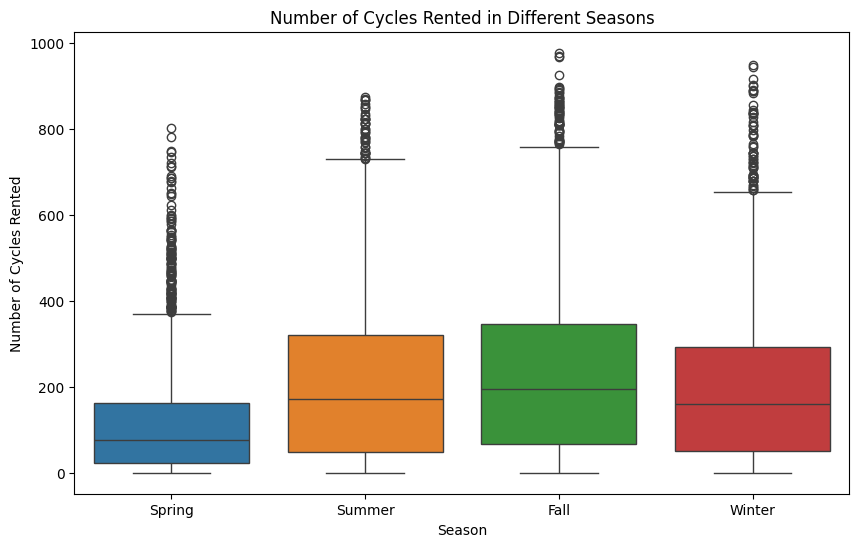

In [22]:
# Sample data (replace with your actual data)
spring_count = df[df['season'] == 1]['count']
summer_count = df[df['season'] == 2]['count']
fall_count = df[df['season'] == 3]['count']
winter_count = df[df['season'] == 4]['count']

# Create a DataFrame for box plot
data = pd.DataFrame({'Spring': spring_count, 'Summer': summer_count, 'Fall': fall_count, 'Winter': winter_count})

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Number of Cycles Rented in Different Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Cycles Rented')
plt.show()


<u>Scenario 17</u> 🐾 : To test if the number of cycles rented has similarity in different weather conditions.

In [21]:
# (Annova)
# H0 : Number of cycles rented in different weather conditions is the same
# H1 : Number of cycles rented in different weather conditions is different

weather1_count = df[df['weather'] == 1]['count']
weather2_count = df[df['weather'] == 2]['count']
weather3_count = df[df['weather'] == 3]['count']
weather4_count = df[df['weather'] == 4]['count']

f_statistic, p_value = stats.f_oneway(weather1_count, weather2_count, weather3_count, weather4_count)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. Number of cycles rented in different weather conditions is different.")
else:
    print("Fail to reject the null hypothesis. Number of cycles rented in different weather conditions is the same.")

F-statistic: 65.53024112793271
P-value: 5.482069475935669e-42
Reject the null hypothesis. Number of cycles rented in different weather conditions is different.


## Miscllaneous Tests

<u>Scenario 12</u> 🐾 : To test if there is a significant difference in median windspeed among multiple seasons.

In [7]:
# (Kruskal Wallis Test)
# H0 : Median windspeed among multiple seasons is the same
# H1 : Median windspeed among multiple seasons is different

spring_windspeed = df[df['season'] == 1]['windspeed']
summer_windspeed = df[df['season'] == 2]['windspeed']
fall_windspeed = df[df['season'] == 3]['windspeed']
winter_windspeed = df[df['season'] == 4]['windspeed']

statistic, p_value = kruskal(spring_windspeed, summer_windspeed, fall_windspeed, winter_windspeed)

print("Kruskal-Wallis statistic:", statistic)
print("P-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in median windspeed among multiple seasons.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in median windspeed among multiple seasons.")

Kruskal-Wallis statistic: 217.10302162379512
P-value: 8.490584997790586e-47
Reject the null hypothesis. There is a significant difference in median windspeed among multiple seasons.


<u>Scenario 13</u> 🐾 : To test if the temperature data is normally distributed.

In [8]:
# (Shapiro Wilk Test)
# H0 : Temperature data is normally distributed
# H1 : Temperature data is not normally distributed

statistic, p_value = shapiro(df['temp'])

print("Shapiro-Wilk statistic:", statistic)
print("P-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. Temperature data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis. Temperature data is normally distributed.")

Shapiro-Wilk statistic: 0.9804227352142334
P-value: 4.577117001754969e-36
Reject the null hypothesis. Temperature data is not normally distributed.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<Axes: ylabel='Frequency'>

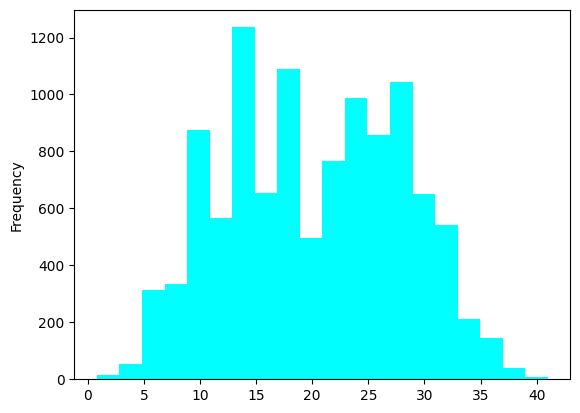

In [13]:
df['temp'].plot(kind='hist', bins=20, color = 'cyan')

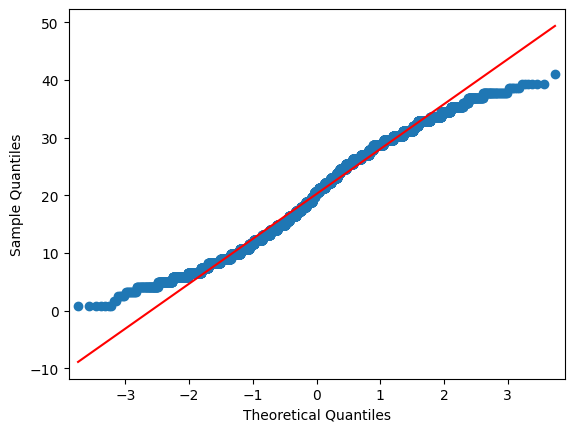

In [10]:
qqplot(df['temp'], line='s')
plt.show()

## Correlation

<u>Scenario 14</u> 🐾 : To test if there is a linear or monotonic relationship between temperature and the count of rental bikes.

In [14]:
# (Pearson and spearman correlation)
# H0 : There is no linear or monotonic relationship between temperature and the count of rental bikes
# H1 : There is a linear or monotonic relationship between temperature and the count of rental bikes

pearson_corr, pearson_p_value = pearsonr(df['temp'], df['count'])
spearman_corr, spearman_p_value = spearmanr(df['temp'], df['count'])

print("Pearson correlation coefficient:", pearson_corr)
print("Pearson correlation p_value:", pearson_p_value)

alpha = 0.05

if pearson_p_value < alpha:
    print("Reject the null hypothesis. There is a linear or monotonic relationship between temperature and the count of rental bikes.")
else:
    print("Fail to reject the null hypothesis. There is no linear or monotonic relationship between temperature and the count of rental bikes.")

print("Spearman correlation coefficient:", spearman_corr)
print("Spearman correlation p_value:", spearman_p_value)

if spearman_p_value < alpha:
    print("Reject the null hypothesis. There is a linear or monotonic relationship between temperature and the count of rental bikes.")
else:
    print("Fail to reject the null hypothesis. There is no linear or monotonic relationship between temperature and the count of rental bikes.")

Pearson correlation coefficient: 0.3944536449672492
Pearson correlation p_value: 0.0
Reject the null hypothesis. There is a linear or monotonic relationship between temperature and the count of rental bikes.
Spearman correlation coefficient: 0.40798939475098117
Spearman correlation p_value: 0.0
Reject the null hypothesis. There is a linear or monotonic relationship between temperature and the count of rental bikes.


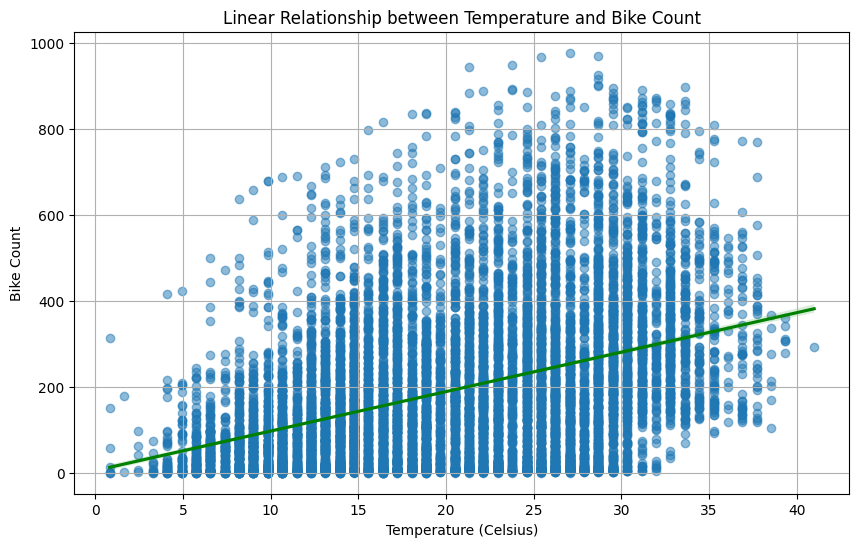

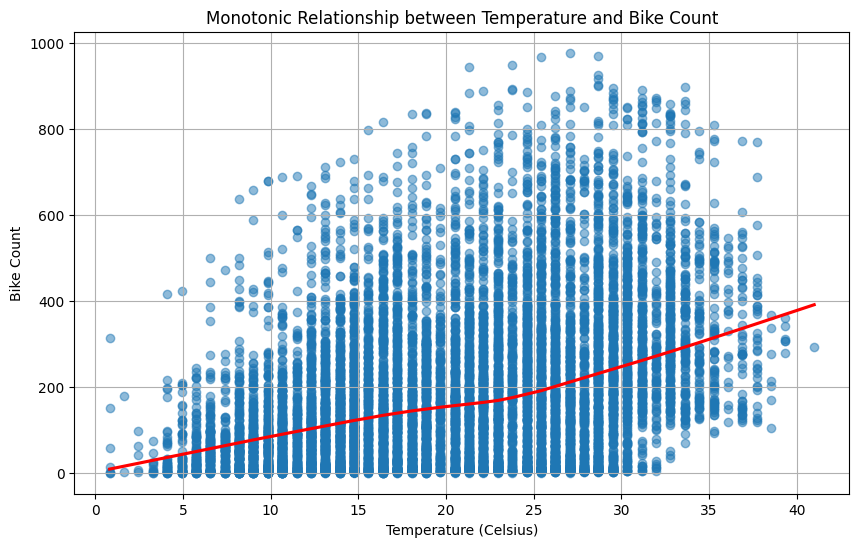

In [18]:
# Scatter plot with regression line for linear relationship
plt.figure(figsize=(10, 6))
sns.regplot(x=df['temp'], y=df['count'], scatter_kws={'alpha':0.5}, line_kws={'color': 'green'})
plt.title('Linear Relationship between Temperature and Bike Count')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Bike Count')
plt.grid(True)
plt.show()

# Scatter plot with regression line for monotonic relationship
plt.figure(figsize=(10, 6))
sns.regplot(x=df['temp'], y=df['count'], scatter_kws={'alpha':0.5}, lowess=True, line_kws={'color': 'red'})
plt.title('Monotonic Relationship between Temperature and Bike Count')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Bike Count')
plt.grid(True)
plt.show()


# Feature Engineering

In [23]:
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [28]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
To: /content/bike_sharing.csv?1642089089
100% 648k/648k [00:00<00:00, 7.55MB/s]


In [32]:
df_new = pd.read_csv('bike_sharing.csv?1642089089')
df_new.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [33]:


df_new['day_type'] = ""

df_new.loc[(df_new['holiday'] == 0) & (df_new['workingday'] == 0), 'day_type'] = "Weekend"
df_new.loc[(df_new['holiday'] == 0) & (df_new['workingday'] == 1), 'day_type'] = "Working-Day"
df_new.loc[(df_new['holiday'] == 1) & (df_new['workingday'] == 0), 'day_type'] = "Holiday"

df_new.drop(['holiday', 'workingday'], axis=1, inplace=True)

df_new.head()

datetime  season  weather  temp   atemp  humidity  windspeed  \
0  2011-01-01 00:00:00       1        1  9.84  14.395        81        0.0   
1  2011-01-01 01:00:00       1        1  9.02  13.635        80        0.0   
2  2011-01-01 02:00:00       1        1  9.02  13.635        80        0.0   
3  2011-01-01 03:00:00       1        1  9.84  14.395        75        0.0   
4  2011-01-01 04:00:00       1        1  9.84  14.395        75        0.0   

   casual  registered  count day_type  
0       3          13     16  Weekend  
1       8          32     40  Weekend  
2       5          27     32  Weekend  
3       3          10     13  Weekend  
4       0           1      1  Weekend

# Summary

- The Yulu project aimed to analyze bike rental data from the Yulu bike-sharing service to gain insights into rental patterns and user behavior.
- The dataset included various features such as date and time, weather conditions, and rental counts.
- Through exploratory data analysis and statistical testing, we investigated factors influencing bike rentals, including weather conditions, holidays, and working days.
- Additionally, we explored the relationship between temperature, bike rentals, and user types.
- Did feature engineering to merge some features and reduce the dataset a little.
- Our analysis revealed key trends and patterns in bike rental behavior, providing valuable insights for optimizing bike-sharing services and informing decision-making strategies for Yulu.